## CS397 MIDTERMS

### Importing the images.

In [1]:
import keras
from keras import datasets

train, test = datasets.fashion_mnist.load_data()

train_data, train_label = train[0], train[1]
test_data, test_label = test[0], test[1]
train_data = train_data.reshape(60000, 28, 28, 1)
test_data= test_data.reshape(10000, 28, 28, 1)

Using TensorFlow backend.


### Plotting 10 training images and 10 test images. All labels are shown as well.

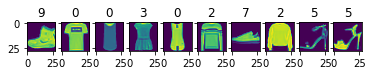

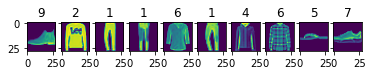

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def display(data, labels):
    show_labels = train_data[:10]
    show_data = test_data[:10]
    f, ax = plt.subplots(1, 10, sharey=True)
    for x in range(10):
        ax[x].imshow(data[x])
        ax[x].set_title(labels[x])
    plt.show()
    
display(train_data, train_label)
display(test_data, test_label)

In [3]:
train_label = keras.utils.to_categorical(train_label, num_classes= 10) 
test_label = keras.utils.to_categorical(test_label, num_classes= 10) 

### First attempt at the model.

In [5]:
from keras import layers
from keras import Sequential

model1 = Sequential()

# Conv + pooling
model1.add(layers.Conv2D(32, 3, input_shape=(28,28,1), activation='relu'))
model1.add(layers.MaxPooling2D(pool_size=(2,2)))
# Conv + pooling
model1.add(layers.Conv2D(64, 3, activation='relu'))
model1.add(layers.MaxPooling2D(pool_size=(2,2)))

# Conv + pooling
model1.add(layers.Conv2D(128, 3, activation='relu'))
model1.add(layers.MaxPooling2D(pool_size=(2,2)))

# Fully Connected
model1.add(layers.Flatten())
model1.add(layers.Dense(1000, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model1.fit(x=train_data, y=train_label, epochs=50, batch_size=128, 
                     validation_data=(test_data, test_label))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 109us/step - loss: 0.7308 - accuracy: 0.7818 - val_loss: 0.4419 - val_accuracy: 0.8349
Epoch 2/50
60000/60000 [==============================] - 5s 83us/step - loss: 0.4001 - accuracy: 0.8526 - val_loss: 0.4300 - val_accuracy: 0.8495
Epoch 3/50
60000/60000 [==============================] - 5s 85us/step - loss: 0.3498 - accuracy: 0.8716 - val_loss: 0.3912 - val_accuracy: 0.8565
Epoch 4/50
60000/60000 [==============================] - 5s 84us/step - loss: 0.3141 - accuracy: 0.8830 - val_loss: 0.3813 - val_accuracy: 0.8655
Epoch 5/50
60000/60000 [==============================] - 5s 84us/step - loss: 0.2881 - accuracy: 0.8917 - val_loss: 0.3499 - val_accuracy: 0.8765
Epoch 6/50
60000/60000 [==============================] - 5s 83us/step - loss: 0.2690 - accuracy: 0.8994 - val_loss: 0.3524 - val_accuracy: 0.8762
Epoch 7/50
60000/60000 [==============================] - 5s 83us/s

### Plotting the loss and accuracy of both training and testing.

No handles with labels found to put in legend.


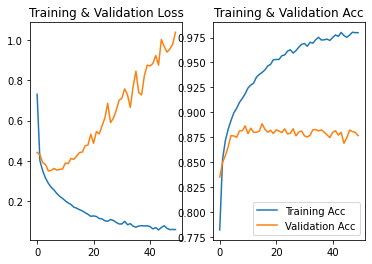

In [6]:
def plot_hist(history):
    loss, acc = history.history['loss'], history.history['accuracy']
    val_loss, val_acc = history.history['val_loss'], history.history['val_accuracy']

    f, ax = plt.subplots(1,2)
    epochs = range(len(loss))
    ax[0].plot(epochs, loss, label='Training Loss')
    ax[0].plot(epochs, val_loss, label='Validation Loss')
    plt.legend()
    ax[0].set_title("Training & Validation Loss")

    ax[1].plot(epochs, acc, label='Training Acc')
    ax[1].plot(epochs, val_acc, label='Validation Acc')
    plt.legend()
    ax[1].set_title("Training & Validation Acc")

plot_hist(history)

We can see that the model is overfitting like crazy. The loss in validation drops really quickly and spikes up while the loss in training continues to drop.

### Second attempt at model.

We need to make a few adjustments to our model:

1) Since the model is overfitting, we add dropout layers to the model.

2) Reduce the complexity of our model by reducing the neurons in our dense layer as well as in our conv layers.

3) Add callback to control overfitting. (This didn't really matter).

In [7]:
model1 = Sequential()

# Conv + pooling
model1.add(layers.Conv2D(16, 3, input_shape=(28,28,1), activation='relu'))
model1.add(layers.MaxPooling2D(pool_size=(2,2)))

# Adding dropout
model1.add(layers.Dropout(0.2))

# Conv + pooling
model1.add(layers.Conv2D(32, 3, activation='relu'))
model1.add(layers.MaxPooling2D(pool_size=(2,2)))

# Conv
model1.add(layers.Conv2D(64, 3, activation='relu'))

# Adding dropout
model1.add(layers.Dropout(0.2))

model1.add(layers.Flatten())
model1.add(layers.Dense(150, activation='relu'))

# Adding dropout
model1.add(layers.Dropout(0.3))

model1.add(layers.Dense(10, activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model1.fit(x=train_data, y=train_label, epochs=50, batch_size=128, 
                     callbacks=[callback], validation_data=(test_data, test_label))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 78us/step - loss: 1.1894 - accuracy: 0.6808 - val_loss: 0.5204 - val_accuracy: 0.8034
Epoch 2/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.5573 - accuracy: 0.7940 - val_loss: 0.4428 - val_accuracy: 0.8389
Epoch 3/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.4796 - accuracy: 0.8235 - val_loss: 0.4105 - val_accuracy: 0.8488
Epoch 4/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.4362 - accuracy: 0.8393 - val_loss: 0.3756 - val_accuracy: 0.8611
Epoch 5/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.3982 - accuracy: 0.8529 - val_loss: 0.3524 - val_accuracy: 0.8725
Epoch 6/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.3815 - accuracy: 0.8593 - val_loss: 0.3372 - val_accuracy: 0.8784
Epoch 7/50
60000/60000 [==============================] - 4s 67us/st

### Plotting the second model.

No handles with labels found to put in legend.


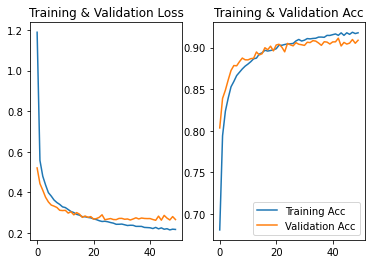

In [10]:
plot_hist(history)


Now we see that the model fits much better to the data. We can see that the overfitting problem has reduced significantly. 